# A top 1% Model for 2019 Esun AI Competition: Taiwan House Price Prediction
## This is an ensemble learning model, composed with a base model and a model, modified based on the city feature
### The modified model is actually composed by 11 models. Each model is developed to predict house price data of  a city. In addition, each model is trained by individual dataset, which were dropped distinct outliers. Those outliers are data of another city.

### In this notebook, we will talk about why the city feature can be a factor to choose outliers?

#### Import package / Prepare the processed house data / Set some plot format 

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('train_processed_0.csv')
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")

### 1st reason why the city feature can be a factor to choose outliers: House price distribution is different in cities.
Outliers are data with a totally different feature value compared to all other data in the dataset. Due to this, people always treated house data with incredible high or low price as outliers. In addition, there is a really different house price distribution in different cities in Taiwan. So, I believe that city feature can be a factor to select outliers.

In the following, swarm plots are shown the house price distribution from the northern to the southern city. Clearly, the house price of Taipei and New Taipei were far higher than the plot of other cities. The highest price points in  Miaoli were even almost lower than Taipei. So, when the model is trained to predict the house price of Taipei, data of Miaoli will be dropped when learning. 

/home/lin/.local/lib/python3.6/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


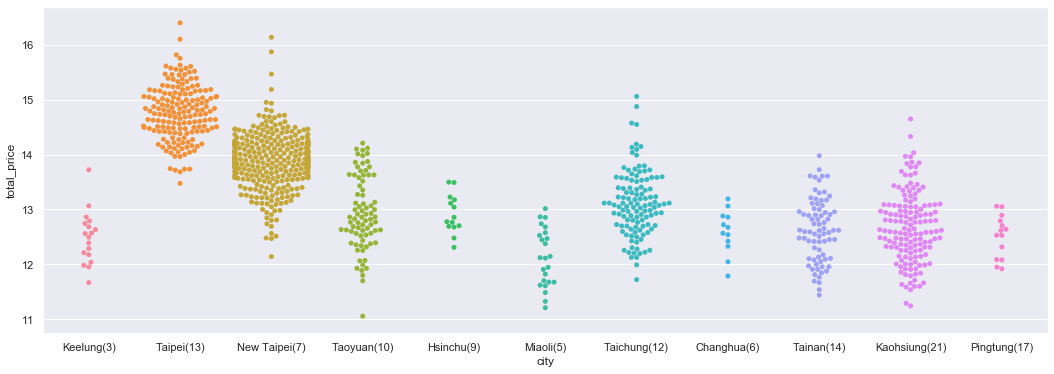

In [5]:
sns.set(rc={'figure.figsize':(18,6)})
city_list = [3, 13, 7, 10, 9, 5, 12, 6, 14, 21, 17] 
cityName_list = ["Keelung(3)", "Taipei(13)", "New Taipei(7)", "Taoyuan(10)", "Hsinchu(9)", "Miaoli(5)", "Taichung(12)", "Changhua(6)", "Tainan(14)", "Kaohsiung(21)", "Pingtung(17)"]
for i in train.city.index:
    train.city.loc[i] = cityName_list[city_list.index(train.city.loc[i])]
ax = sns.swarmplot(x=train.city, y=train.total_price.head(1000), order = cityName_list, data=train)
plt.show()

### 2nd reason why the city feature can be a factor to choose outliers: Correlation of features are different in cities.
Outliers can be also data with different feature. In the following form and plot, the important feature correaltion to house price in three different cities is shown. 
The most three important feature to Taipei and Kaoshiung house price were both class of sites, such as the number of class two sites in 1000 meter to Taipei and the number of class six sites in 100000 meter to Kaoshiung figure. However, those to Taichung house price are village income median, land area and building area. This clearly shows that house of Taichung is distict to other two cities and that means Taichung Houses data could be an outliers compared to other two cities. 

In [12]:
corrBar = pd.read_csv("corrBar.csv")
corrBar.drop(columns = ['building_id'], axis = 1)

,City,Feature_Importance,Feature_Name,Feature_Correlation
0,Taipei(13),1st,II_1000,0.545411
1,Taipei(13),2nd,XIII_5000,0.530164
2,Taipei(13),3rd,III_1000,0.485381
3,Taichung(12),1st,village_income_median,0.347420
4,Taichung(12),2nd,land_area,0.321758
5,Taichung(12),3rd,building_area,0.293506
6,Kaohsiung(21),1st,VI_10000,0.374364
7,Kaohsiung(21),2nd,XI_10000,0.357466
8,Kaohsiung(21),3rd,XIII_10000,0.357453


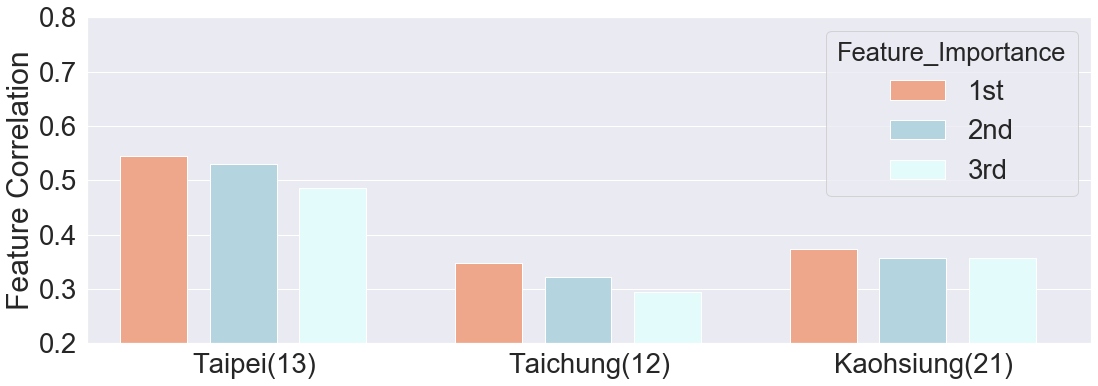

In [13]:
sns.set(rc={'figure.figsize':(18,6)})
sns.set(font_scale=2.5)
colorList = ["lightsalmon", "lightblue", "lightcyan"]
sns.set_palette(colorList)
ax = sns.barplot(x=corrBar.City, y=corrBar.Feature_Correlation, hue=corrBar.Feature_Importance, data=corrBar)
ax.set_ylim(0.2, 0.8)

for i in ax.patches:
    i.set_width(0.2)

plt.yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
ax.set_xlabel("")
ax.set_ylabel("Feature Correlation")
plt.show()